### Goal:

**The goal is to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets, based off the 538 article. I will try to reach a similar conclusion. I will use pandas and seaborn for visualization.**

**Link to article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

The data is openly available on 538's github: https://github.com/fivethirtyeight/data. 
There are two csv files, one named **fandango_scrape.csv** with Fandango Stars and Displayed Ratings, and the other named **all_sites_scores.csv** with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scrape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

### Importing the packages I will need for the project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Exploring Fandango Displayed Scores versus True User Ratings**

In [2]:
#importing the fandango data set
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


The **Stars** column represents the ratings that the user see on the website, and the column **Rating** are the actual ratings of the user. We can clearly see that the ratings are rounded up to a higher value.

In [4]:
fandango.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

The data set contains 504 rows and has no null values.

In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


The average value in the Stars column is also higher than the average value in the Rating column.

---

**Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes.**

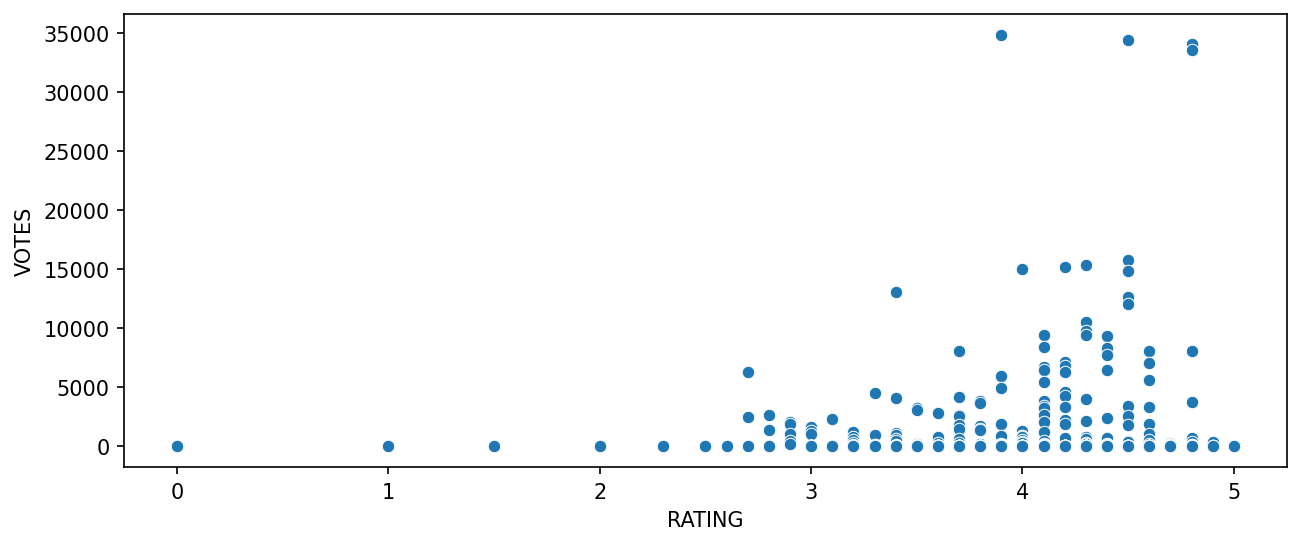

In [6]:
plt.figure(figsize=(10,4),dpi = 150)
sns.scatterplot(data=fandango,x= 'RATING',y= 'VOTES');

---

**Displaying the correlation between columns**

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


---

**Extracting the year from the Film column and creating a separate column displaying the year**

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',''))

In [9]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


---

**How many movies are in the Fandango DataFrame per year**

In [10]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

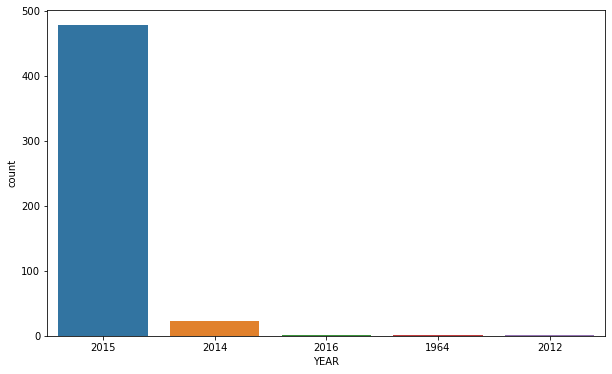

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(data= fandango, x= 'YEAR')

---

**The 10 movies with the highest number of votes?**

In [12]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


---

**How many movies have zero votes?**

In [13]:
no_votes = fandango['VOTES']==0

In [14]:
no_votes.sum()

69

---

**Creating a data frame only with user-rated movies**

In [15]:
user_rated = fandango[fandango['VOTES'] > 0]

In [16]:
user_rated

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


---

**Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).**

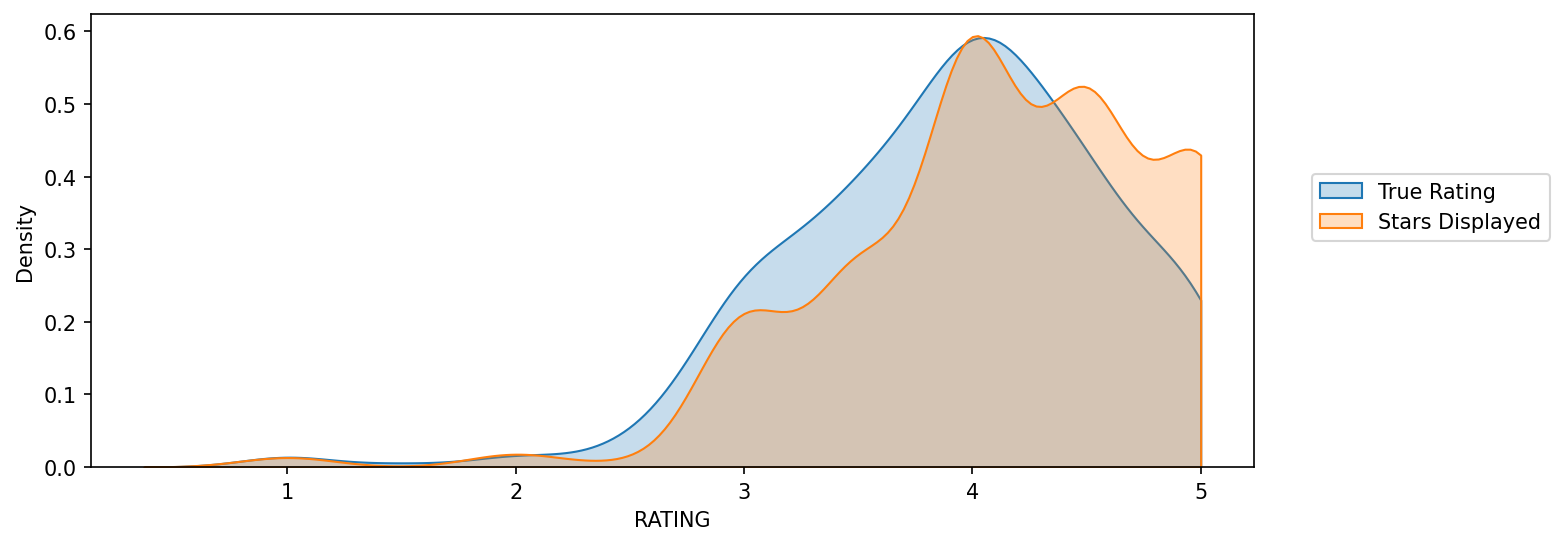

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=user_rated, x= 'RATING', clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=user_rated,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05,0.5));

---

**Creating a new column of the difference between STARS displayed versus true RATING.**

In [18]:
user_rated['STARS_DIFF']=(user_rated['STARS']-user_rated['RATING']).round(2)

C:\Users\Marko\AppData\Local\Temp/ipykernel_2128/2893610383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rated['STARS_DIFF']=(user_rated['STARS']-user_rated['RATING']).round(2)


In [19]:
user_rated

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


---

**Creating a count plot to display the number of times a certain difference occurs**

In [20]:
user_rated['STARS_DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: STARS_DIFF, dtype: int64

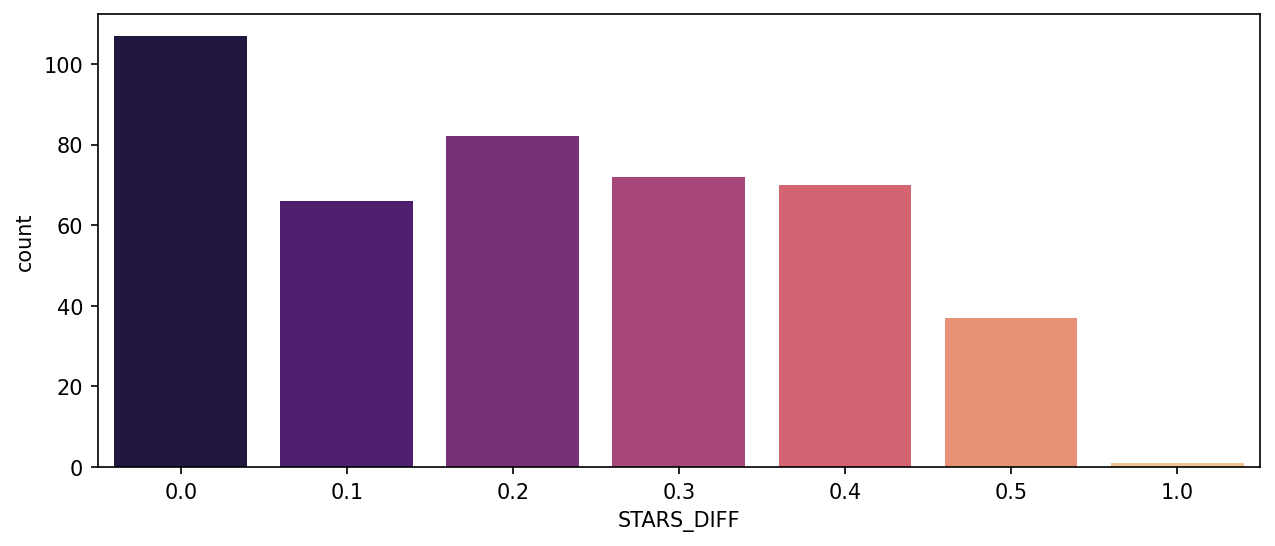

In [21]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=user_rated,x='STARS_DIFF',palette='magma');

## Comparison of Fandango Ratings to Other Sites

In [22]:
all_sites=pd.read_csv('all_sites_scores.csv')

In [23]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [24]:
all_sites.info

<bound method DataFrame.info of                                           FILM  RottenTomatoes  \
0               Avengers: Age of Ultron (2015)              74   
1                            Cinderella (2015)              85   
2                               Ant-Man (2015)              80   
3                       Do You Believe? (2015)              18   
4                Hot Tub Time Machine 2 (2015)              14   
..                                         ...             ...   
141                          Mr. Holmes (2015)              87   
142                                 '71 (2015)              97   
143                 Two Days, One Night (2014)              97   
144  Gett: The Trial of Viviane Amsalem (2015)             100   
145         Kumiko, The Treasure Hunter (2015)              87   

     RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                     86          66              7.1   7.8   
1                     80          67             

In [25]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


---

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Creating a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

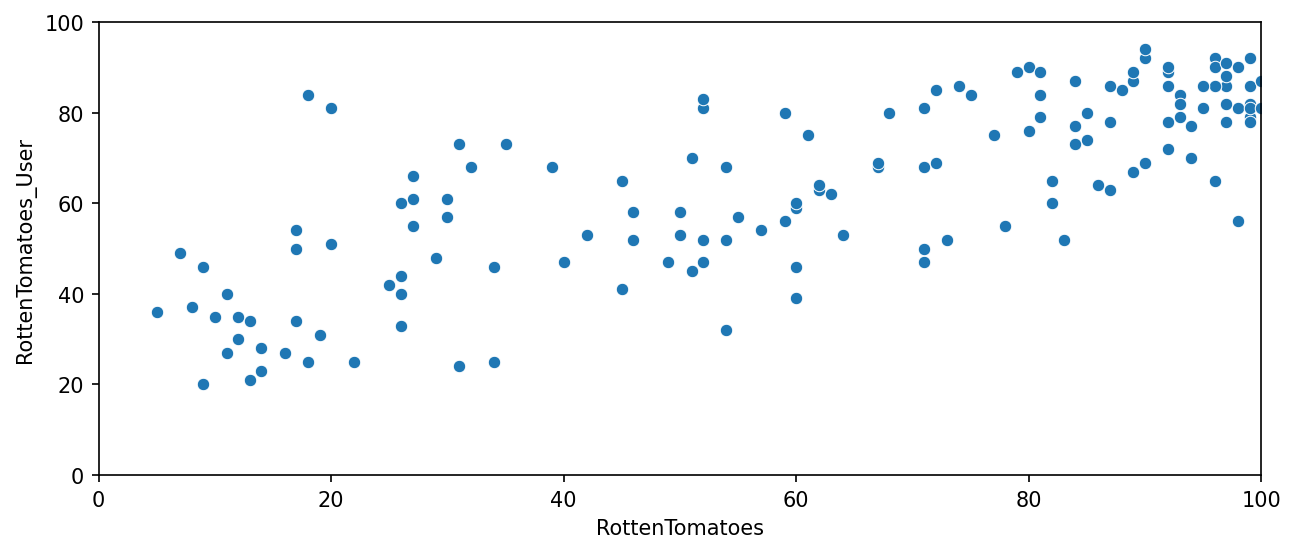

In [26]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100);

---

**Creating a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes.**

In [27]:
all_sites['Rotten_Diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [28]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


---

**Ploting the distribution of the differences between RT Critics Score and RT User Score.**

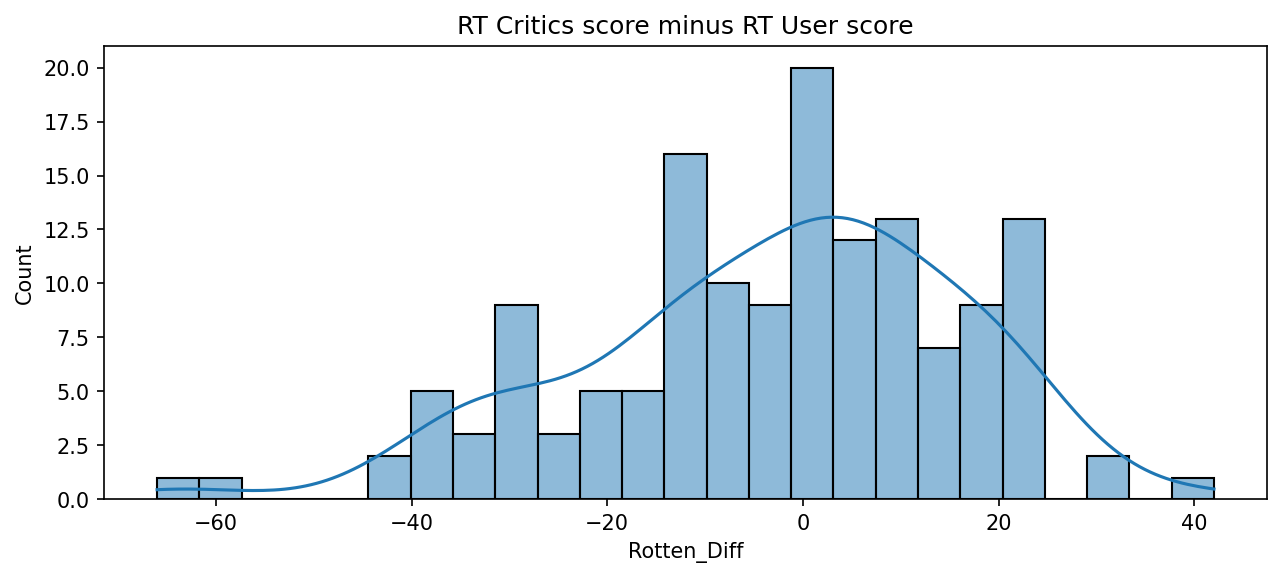

In [29]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title('RT Critics score minus RT User score');

---

**Creating a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

Text(0.5, 1.0, 'Absolute Difference between RT Critics score and RT User Score')

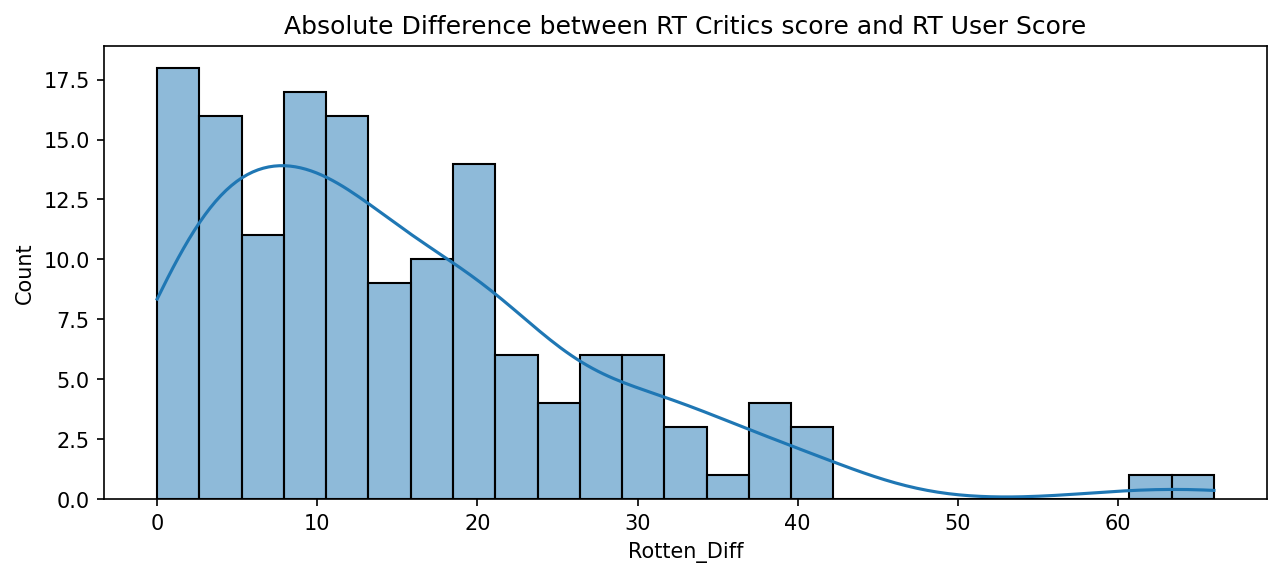

In [30]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title('Absolute Difference between RT Critics score and RT User Score')

**Let's find out which movies are causing the largest differences. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [31]:
print('Users like more than Critics')
all_sites.nsmallest(10,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users like more than Critics


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39
132,Max (2015),-38
15,Taken 3 (2015),-37
19,Pixels (2015),-37
51,Entourage (2015),-36
47,Annie (2014),-34


In [32]:
print('Critics like more than Users')
all_sites.nlargest(10,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics like more than Users


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24
90,The SpongeBob Movie: Sponge Out of Water (2015),23
7,Top Five (2014),22
11,Black Sea (2015),22
87,Maggie (2015),22


---

### Meta Critic

Let's now take a look at Meta Critic. MC has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**Creating a scatterplot exploring the relationship between MC Critic reviews and MC User reviews.**

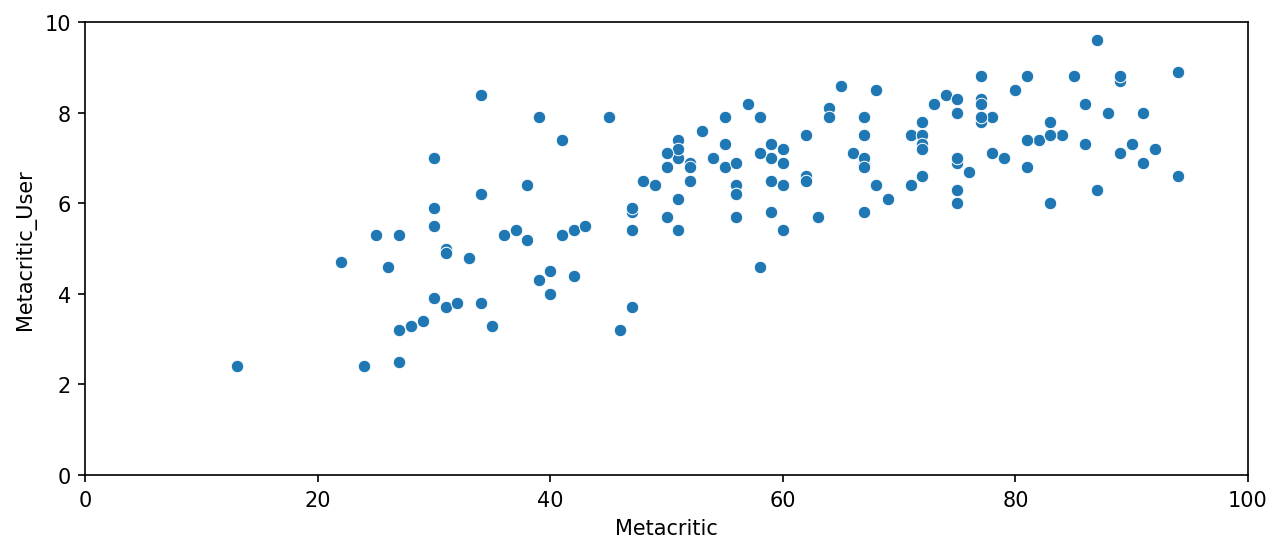

In [33]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10);

### Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Combining the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so I will do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [34]:
df = pd.merge(fandango, all_sites,on='FILM',how='inner')

In [35]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [36]:
df.info

<bound method DataFrame.info of                                    FILM  STARS  RATING  VOTES  YEAR  \
0           Fifty Shades of Grey (2015)    4.0     3.9  34846  2015   
1                 Jurassic World (2015)    4.5     4.5  34390  2015   
2                American Sniper (2015)    5.0     4.8  34085  2015   
3                      Furious 7 (2015)    5.0     4.8  33538  2015   
4                     Inside Out (2015)    4.5     4.5  15749  2015   
..                                  ...    ...     ...    ...   ...   
140  Kumiko, The Treasure Hunter (2015)    3.5     3.5     41  2015   
141  The Diary of a Teenage Girl (2015)    4.0     3.6     38  2015   
142            The Wrecking Crew (2015)    4.5     4.2     38  2015   
143                    Tangerine (2015)    4.0     3.9     36  2015   
144            Maps to the Stars (2015)    3.5     3.1     35  2015   

     RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                25                 

---

**Normalize columns to Fandango STARS and RATINGS 0-5**

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

In [37]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff'],
      dtype='object')

In [38]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1) #to normalize a scale from 1 to 100, to 1 to 5
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1) #to normalize a scale from 1 to 100, to 1 to 5

In [39]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1) #to normalize a scale from 1 to 100, to 1 to 5
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1) #to normalize a scale from 1 to 10, to 1 to 5

In [40]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1) #to normalize a scale from 1 to 10, to 1 to 5

In [41]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [42]:
df_norm = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [43]:
df_norm

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


---

### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?

In [44]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

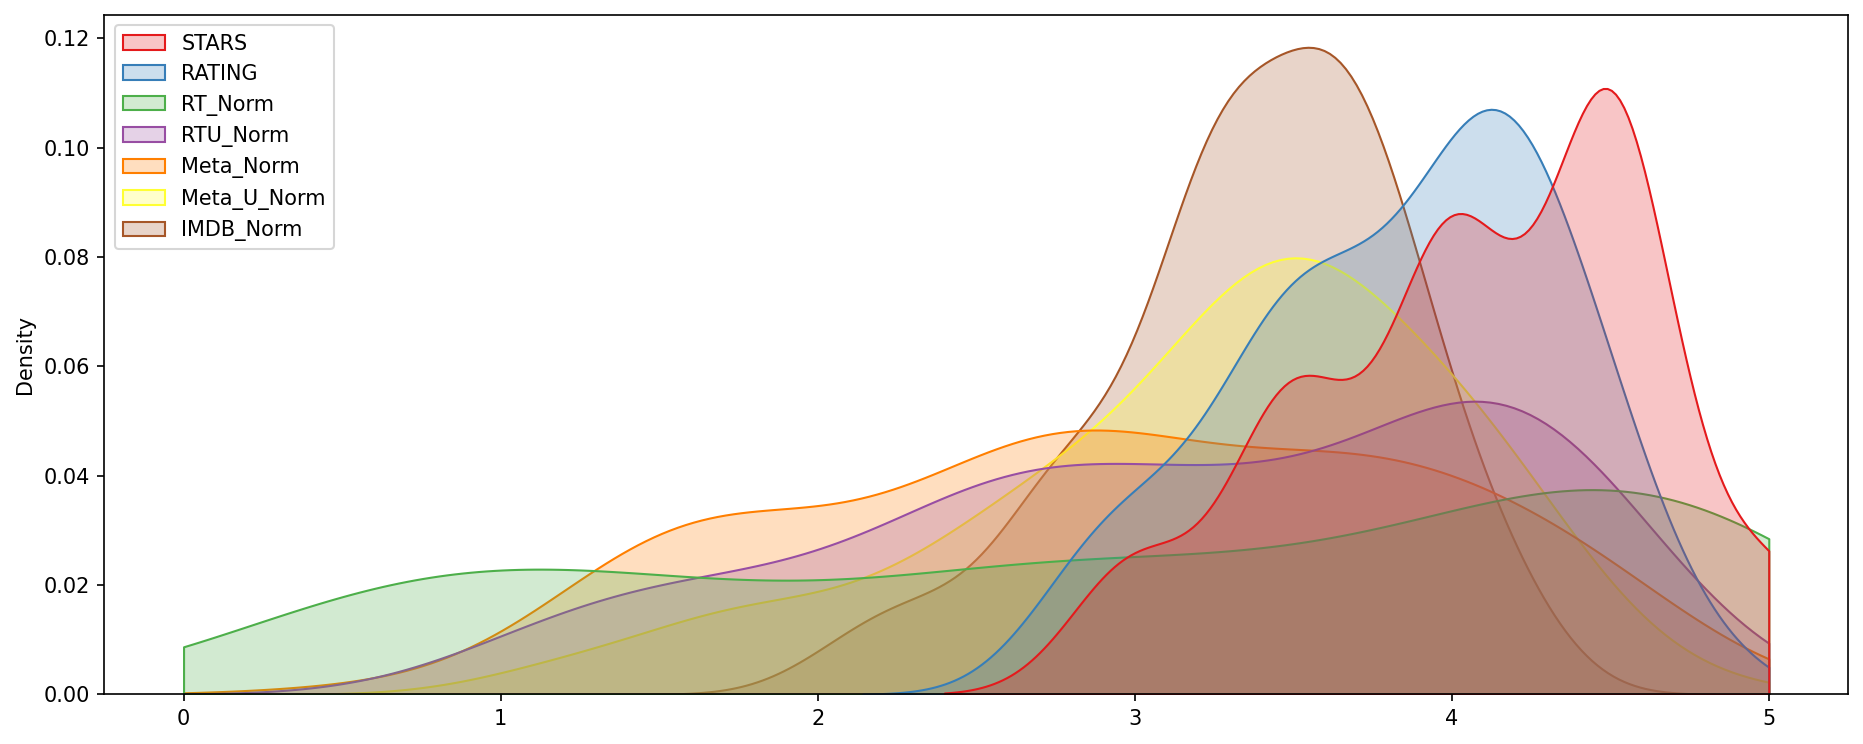

In [45]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=df_norm,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Stars and Rating clearly show the distribution of ratings between 3 and 5, much higher than the distribution of other pages. There are practically no films that are rated lower than 2.5.**

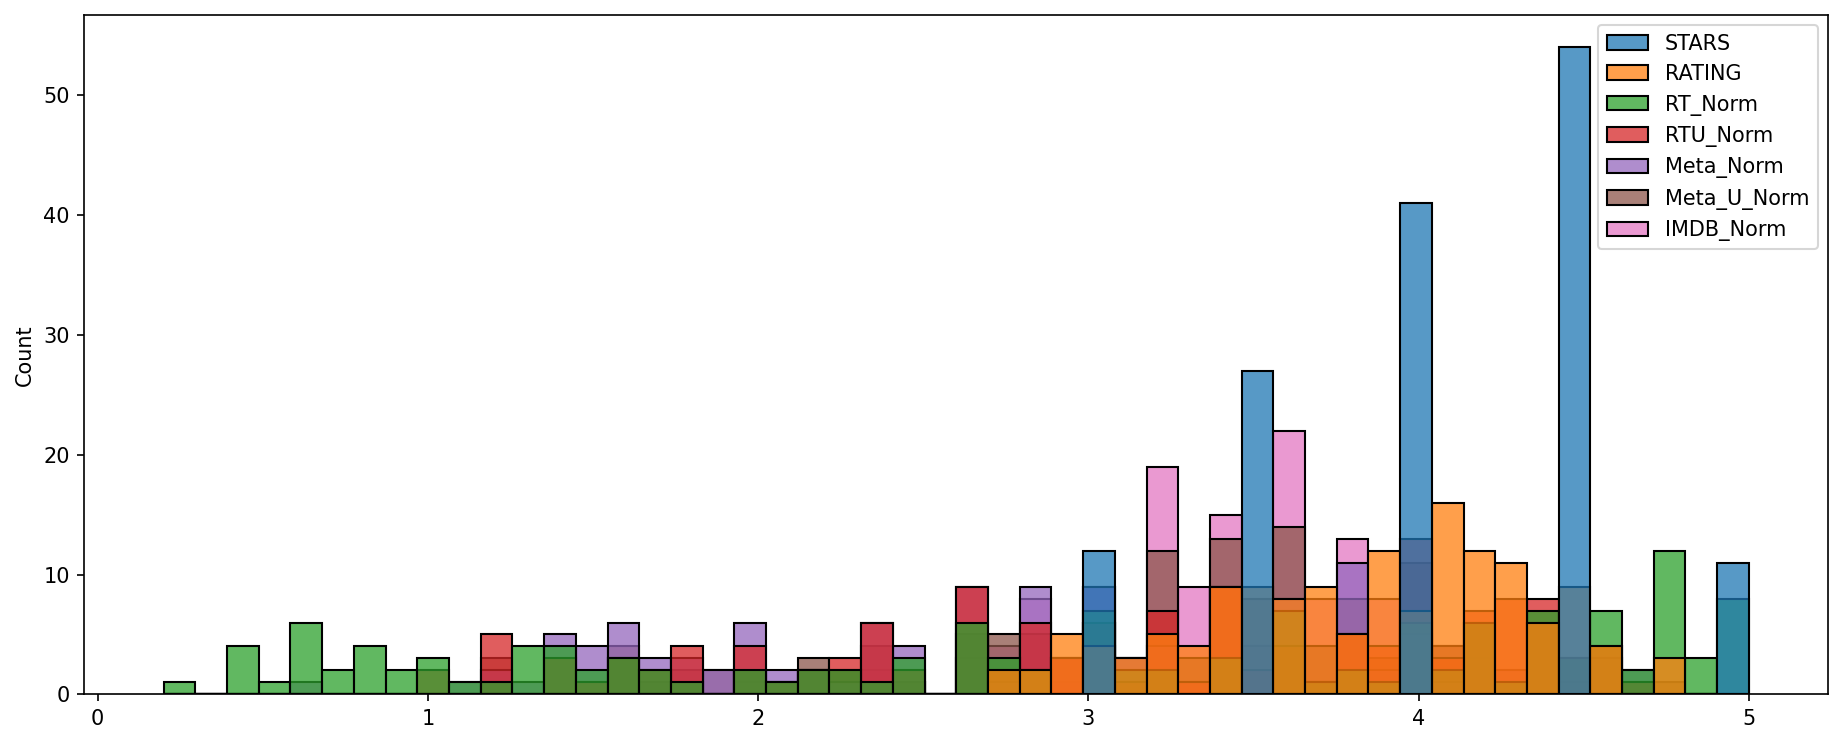

In [46]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(df_norm,bins=50);

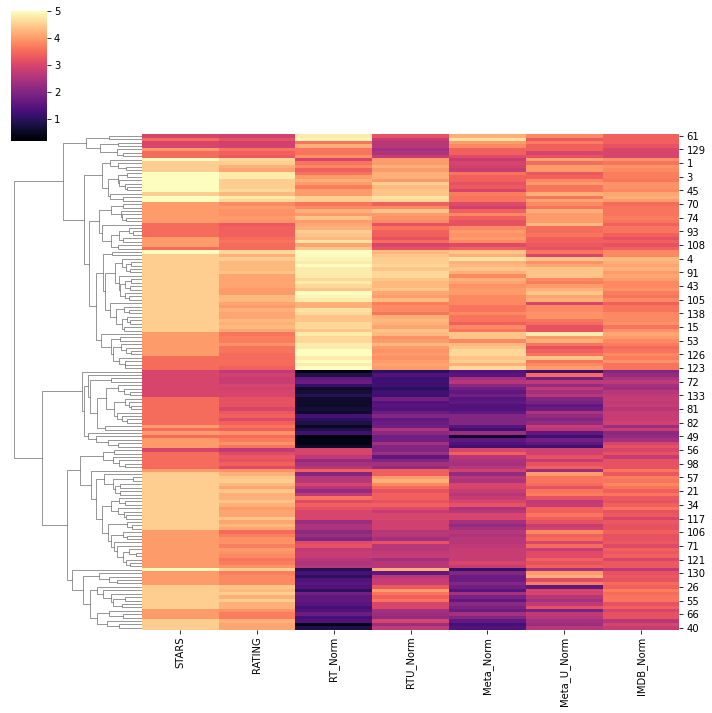

In [47]:
sns.clustermap(df_norm,cmap='magma',col_cluster=False);

**This clustermap visualization of all normalized scores shows highly rated movies clustered together versus poorly rated movies. We can clearly see how all the sites cluster poorly rated movies together in dark color except fandando ratings.**

### Conclusion:
**I came to the conclusion that Fandango intentionally rates movies with a higher rating than other similar sites. Fandango also sells tickets for those same films, it can be said that they are not objective in the movie ratings and that they are in a conflict of interest, in order to increase the profit from ticket sales.**